In [21]:
import os, sys
project_path = os.getcwd()
sys.path.append(project_path)
from P1_MazeLoader import MazeLoader
from collections import deque
import matplotlib.pyplot as plt

# Graph visualization
import networkx as nx

### FUNCION PARA VISUALIZAR EL GRAFO

In [22]:
def visualize_maze_graph(maze_loader):
    # Creación de un objeto grafo con networkx
    G = nx.Graph()
    
    # Grafo que representa el laberinto
    maze_graph = maze_loader.get_graph()
    
    # Se agrega aristas al grafo basados en la estructura del laberinto
    for node, neighbors in maze_graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    # Se establece las posiciones de los nodos en la cuadrícula
    pos = {node: (node[1], -node[0]) for node in G.nodes()} 
    
    # Se grafica el grafo
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color = 'lightgreen', with_labels = True, node_size = 500, font_size = 6, edge_color = 'black')
    
    plt.title("Graph representation of the maze")
    plt.show()

## 1. IMPLEMENTACION DE ALGORITMO BFS

### FUNCION PARA ENCONTRAR LAS COORDENADAS DE LA ENTRADA Y SALIDA DEL LABERINTO

In [23]:
def find_start_and_goal(maze):
    start = None
    goal = None
    for y, row in enumerate(maze):
        for x, cell in enumerate(row):
            if cell == 'E':
                start = (y, x)
            elif cell == 'S':
                goal = (y, x)
            if start and goal:
                return start, goal
    return start, goal

### FUNCION DE BUSQUEDA BFS

In [24]:
# def bfs(graph, start, goal):
#     queue = deque([start])
#     visited = {start: None}
#     while queue:
#         current = queue.popleft()
#         if current == goal:
#             break
#         for neighbor in graph[current]:
#             if neighbor not in visited:
#                 visited[neighbor] = current
#                 queue.append(neighbor)
#     path = []
#     while goal:
#         path.append(goal)
#         goal = visited[goal]
#     path.reverse()
#     return path

# NUEVO INTENTO BACKTRACKING

In [25]:
def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start: None}

    # Contador para el número total de nodos visitados
    total_visited = 0  

    # Contador de backtracking
    backtracking_count = 0

    while queue:
        current = queue.popleft()
        # Incremento del contador del número total de nodos visitados
        total_visited += 1  
        if current == goal:
            # Reconstruir el camino al encontrar la salida
            path = []
            while current:
                path.append(current)
                current = visited[current]
            path.reverse()
            return path, backtracking_count, total_visited

        # Explorar los vecinos
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)
            elif neighbor in visited:
                # Incrementar el contador de backtracking si el vecino ya ha sido visitado
                backtracking_count += 1
    
    return path, backtracking_count, total_visited

## LABERINTO 1

In [26]:
def study_case_1():
    print("LABERINTO 1")
    # Cargar y graficar el laberinto
    maze_file = 'laberinto1.txt'
    maze_loader = MazeLoader(maze_file).load_Maze()
    # Imprimir el laberinto después de cargarlo
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("ESTRUCTURA INICIAL DEL LABERINTO:")
    print(maze_loader.maze)
    # Visualizar el laberinto después de cargarlo
    maze_loader.plot_maze()

    # Obtener el grafo e imprimirlo
    graph = maze_loader.get_graph()
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("REPRESENTACION DEL LABERINTO COMO GRAFO:")
    print(graph)
    # Visualizar grafo
    visualize_maze_graph(maze_loader)

    # Se encuentran las coordenadas de la entrada y las de la salida del laberinto
    start, goal = find_start_and_goal(maze_loader.maze)

    # Se implementa el algoritmo BFS para trazar el camino de solución
    path, backtracking_count, total_visited = bfs(graph, start, goal)
    
    print("\n __________________________________________________________________________________________________________________________________________\n")
    # Se imprime el camino de solución
    print("Camino de solución encontrada:", path)
    # Se imprime el número de veces que el algoritmo hizo backtracking
    print("Número de retrocesos (backtracking):", backtracking_count)
    # Se imprime el número total de nodos visitados antes de llegar a la salida del laberinto
    print("Número total de nodos visitados:", total_visited)
    # Se imprime el número de nodos (celdas) que forman parte del camino de solución encontrada
    num_cell_path = len(path)
    print(f"El algoritmo BFS encontró una solución de {num_cell_path} nodos")
    # Visualización de la solución encontrada con BFS 
    print("GRAFICO DE LA SOLUCION ENCONTRADA CON BFS PARA EL LABERINTO 1:")
    for (y, x) in path:
        if maze_loader.maze[y][x] not in 'ES':
            maze_loader.maze[y][x] = '.'
    maze_loader.plot_maze()

LABERINTO 1
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto1.txt

 __________________________________________________________________________________________________________________________________________

ESTRUCTURA INICIAL DEL LABERINTO:
[['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'], ['#', 'E', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'], ['#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#'], ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#'], ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#'], ['#', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'], ['#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#'], ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'S', '#'], ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']]


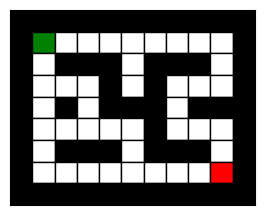


 __________________________________________________________________________________________________________________________________________

REPRESENTACION DEL LABERINTO COMO GRAFO:
defaultdict(<class 'list'>, {(1, 1): [(1, 2), (2, 1)], (1, 2): [(1, 1), (1, 3)], (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3), (1, 5)], (1, 5): [(1, 4), (1, 6), (2, 5)], (1, 6): [(1, 5), (1, 7)], (1, 7): [(1, 6), (1, 8)], (1, 8): [(1, 7), (1, 9)], (1, 9): [(1, 8), (2, 9)], (2, 1): [(1, 1), (3, 1)], (2, 5): [(1, 5), (3, 5)], (2, 9): [(1, 9), (3, 9)], (3, 1): [(3, 2), (2, 1), (4, 1)], (3, 2): [(3, 1), (3, 3)], (3, 3): [(3, 2), (4, 3)], (3, 5): [(2, 5)], (3, 7): [(3, 8), (4, 7)], (3, 8): [(3, 7), (3, 9)], (3, 9): [(3, 8), (2, 9)], (4, 1): [(3, 1), (5, 1)], (4, 3): [(3, 3), (5, 3)], (4, 7): [(3, 7), (5, 7)], (5, 1): [(5, 2), (4, 1), (6, 1)], (5, 2): [(5, 1), (5, 3)], (5, 3): [(5, 2), (5, 4), (4, 3)], (5, 4): [(5, 3), (5, 5)], (5, 5): [(5, 4), (6, 5)], (5, 7): [(5, 8), (4, 7)], (5, 8): [(5, 7), (5, 9)], (5, 9): [(

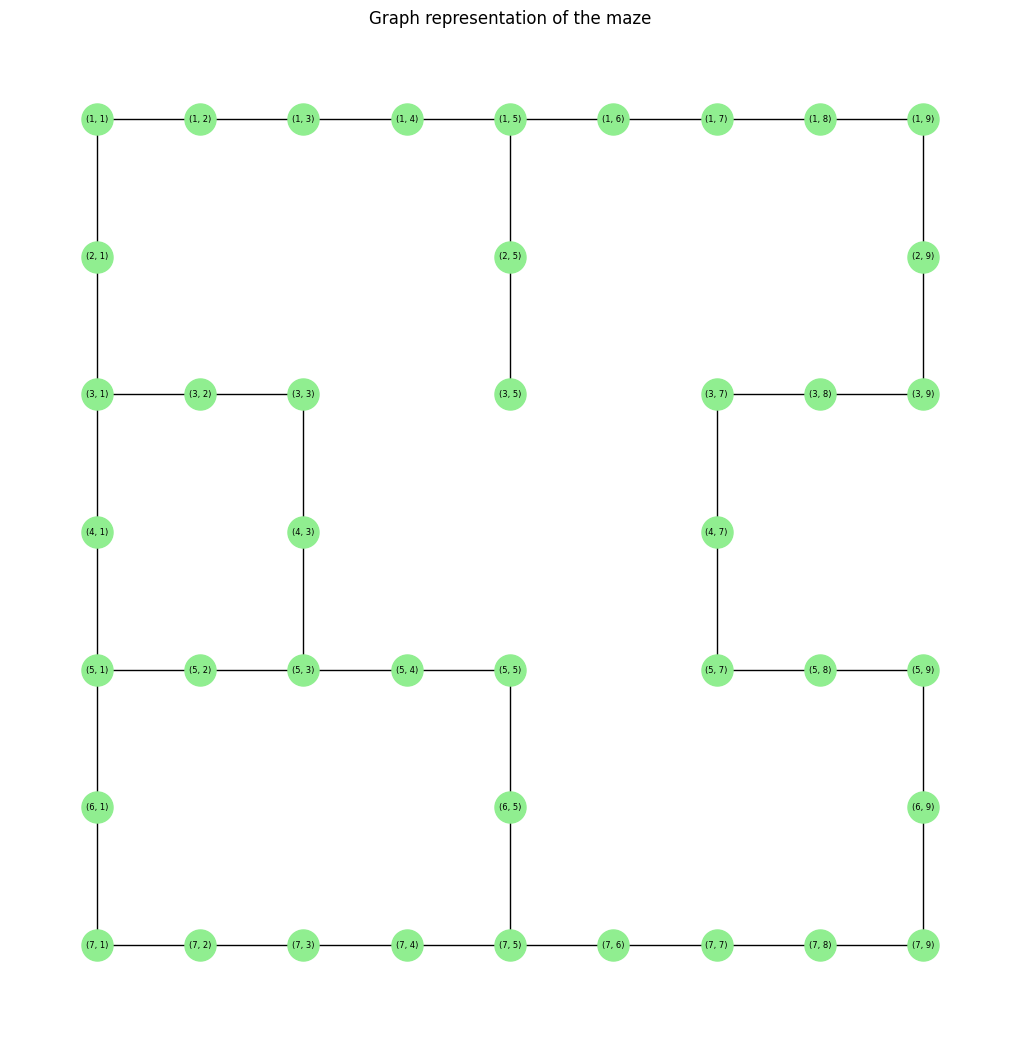


 __________________________________________________________________________________________________________________________________________

Camino de solución encontrada: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)]
Número de retrocesos (backtracking): 41
Número total de nodos visitados: 39
El algoritmo BFS encontró una solución de 15 nodos
GRAFICO DE LA SOLUCION ENCONTRADA CON BFS PARA EL LABERINTO 1:


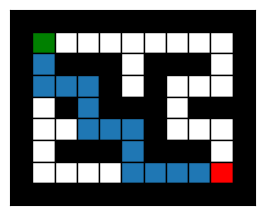

In [27]:
if __name__ == '__main__':
    study_case_1()

## LABERINTO 2

In [28]:
def study_case_2():
    print("LABERINTO 2")
    # Cargar y graficar el laberinto
    maze_file = 'laberinto2.txt'
    maze_loader = MazeLoader(maze_file).load_Maze()
    # Imprimir el laberinto después de cargarlo
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("ESTRUCTURA INICIAL DEL LABERINTO:")
    print(maze_loader.maze)
    # Visualizar el laberinto después de cargarlo
    maze_loader.plot_maze()

    # Obtener el grafo e imprimirlo
    graph = maze_loader.get_graph()
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("REPRESENTACION DEL LABERINTO COMO GRAFO:")
    print(graph)
    # Visualizar grafo
    visualize_maze_graph(maze_loader)

    # Se encuentran las coordenadas de la entrada y las de la salida del laberinto
    start, goal = find_start_and_goal(maze_loader.maze)

    # Se implementa el algoritmo BFS para trazar el camino de solución
    path, backtracking_count, total_visited = bfs(graph, start, goal)
    
    print("\n __________________________________________________________________________________________________________________________________________\n")
    # Se imprime el camino de solución
    print("Camino de solución encontrada:", path)
    # Se imprime el número de veces que el algoritmo hizo backtracking
    print("Número de retrocesos (backtracking):", backtracking_count)
    # Se imprime el número total de nodos visitados antes de llegar a la salida del laberinto
    print("Número total de nodos visitados:", total_visited)
    # Se imprime el número de nodos (celdas) que forman parte del camino de solución encontrada
    num_cell_path = len(path)
    print(f"El algoritmo BFS encontró una solución de {num_cell_path} nodos")
    # Visualización de la solución encontrada con BFS 
    print("GRAFICO DE LA SOLUCION ENCONTRADA CON BFS PARA EL LABERINTO 2:")
    for (y, x) in path:
        if maze_loader.maze[y][x] not in 'ES':
            maze_loader.maze[y][x] = '.'
    maze_loader.plot_maze()

LABERINTO 2
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto2.txt

 __________________________________________________________________________________________________________________________________________

ESTRUCTURA INICIAL DEL LABERINTO:
[['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'], ['#', 'E', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'], ['#', '#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#'], ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#', '#', ' ', ' ', ' ', '#'], ['#', '#', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', 

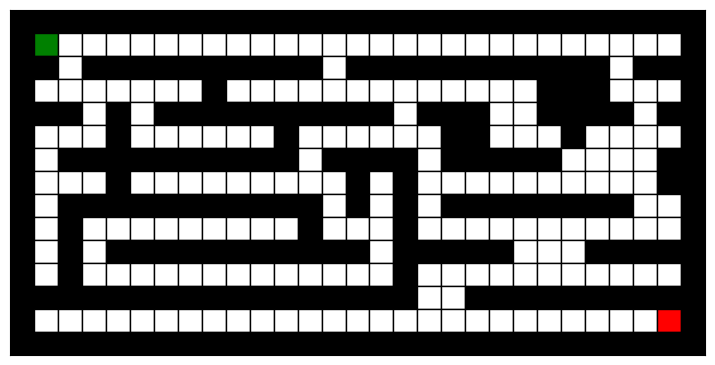


 __________________________________________________________________________________________________________________________________________

REPRESENTACION DEL LABERINTO COMO GRAFO:
defaultdict(<class 'list'>, {(1, 1): [(1, 2)], (1, 2): [(1, 1), (1, 3), (2, 2)], (1, 3): [(1, 2), (1, 4)], (1, 4): [(1, 3), (1, 5)], (1, 5): [(1, 4), (1, 6)], (1, 6): [(1, 5), (1, 7)], (1, 7): [(1, 6), (1, 8)], (1, 8): [(1, 7), (1, 9)], (1, 9): [(1, 8), (1, 10)], (1, 10): [(1, 9), (1, 11)], (1, 11): [(1, 10), (1, 12)], (1, 12): [(1, 11), (1, 13)], (1, 13): [(1, 12), (1, 14), (2, 13)], (1, 14): [(1, 13), (1, 15)], (1, 15): [(1, 14), (1, 16)], (1, 16): [(1, 15), (1, 17)], (1, 17): [(1, 16), (1, 18)], (1, 18): [(1, 17), (1, 19)], (1, 19): [(1, 18), (1, 20)], (1, 20): [(1, 19), (1, 21)], (1, 21): [(1, 20), (1, 22)], (1, 22): [(1, 21), (1, 23)], (1, 23): [(1, 22), (1, 24)], (1, 24): [(1, 23), (1, 25)], (1, 25): [(1, 24), (1, 26), (2, 25)], (1, 26): [(1, 25), (1, 27)], (1, 27): [(1, 26)], (2, 2): [(1, 2), (3, 2)

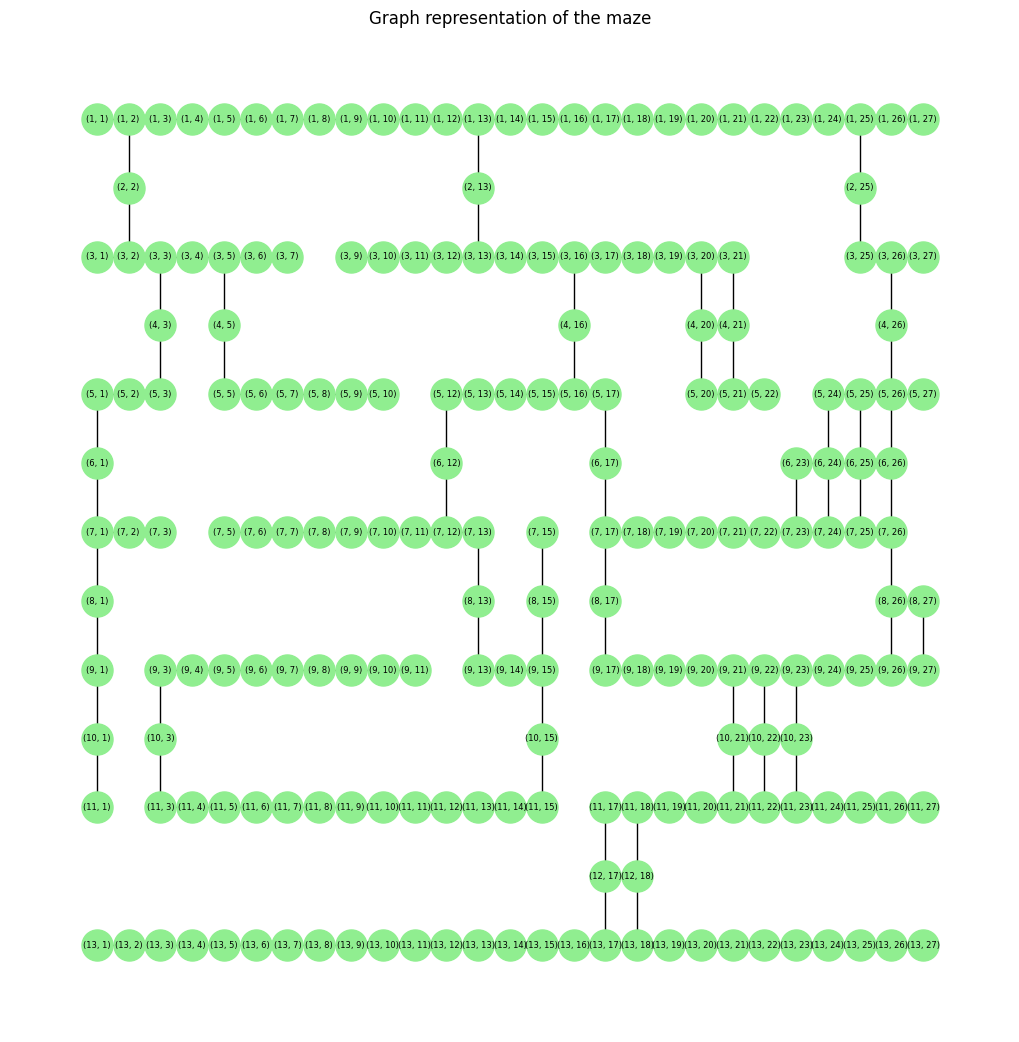


 __________________________________________________________________________________________________________________________________________

Camino de solución encontrada: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 13), (3, 13), (3, 14), (3, 15), (3, 16), (4, 16), (5, 16), (5, 17), (6, 17), (7, 17), (8, 17), (9, 17), (9, 18), (9, 19), (9, 20), (9, 21), (10, 21), (11, 21), (11, 20), (11, 19), (11, 18), (12, 18), (13, 18), (13, 19), (13, 20), (13, 21), (13, 22), (13, 23), (13, 24), (13, 25), (13, 26), (13, 27)]
Número de retrocesos (backtracking): 213
Número total de nodos visitados: 183
El algoritmo BFS encontró una solución de 45 nodos
GRAFICO DE LA SOLUCION ENCONTRADA CON BFS PARA EL LABERINTO 2:


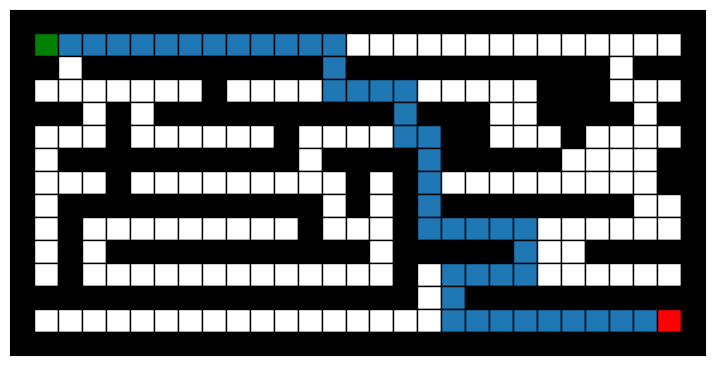

In [29]:
if __name__ == '__main__':
    study_case_2()

## LABERINTO 3

In [30]:
def study_case_3():
    print("LABERINTO 3")
    # Cargar y graficar el laberinto
    maze_file = 'laberinto3.txt'
    maze_loader = MazeLoader(maze_file).load_Maze()
    # Imprimir el laberinto después de cargarlo
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("ESTRUCTURA INICIAL DEL LABERINTO:")
    print(maze_loader.maze)
    # Visualizar el laberinto después de cargarlo
    maze_loader.plot_maze()

    # Obtener el grafo e imprimirlo
    graph = maze_loader.get_graph()
    print("\n __________________________________________________________________________________________________________________________________________\n")
    print("REPRESENTACION DEL LABERINTO COMO GRAFO:")
    print(graph)
    # Visualizar grafo
    visualize_maze_graph(maze_loader)

    # Se encuentran las coordenadas de la entrada y las de la salida del laberinto
    start, goal = find_start_and_goal(maze_loader.maze)

    # Se implementa el algoritmo BFS para trazar el camino de solución
    path, backtracking_count, total_visited = bfs(graph, start, goal)
    
    print("\n __________________________________________________________________________________________________________________________________________\n")
    # Se imprime el camino de solución
    print("Camino de solución encontrada:", path)
    # Se imprime el número de veces que el algoritmo hizo backtracking
    print("Número de retrocesos (backtracking):", backtracking_count)
    # Se imprime el número total de nodos visitados antes de llegar a la salida del laberinto
    print("Número total de nodos visitados:", total_visited)
    # Se imprime el número de nodos (celdas) que forman parte del camino de solución encontrada
    num_cell_path = len(path)
    print(f"El algoritmo BFS encontró una solución de {num_cell_path} nodos")
    # Visualización de la solución encontrada con BFS 
    print("GRAFICO DE LA SOLUCION ENCONTRADA CON BFS PARA EL LABERINTO 3:")
    for (y, x) in path:
        if maze_loader.maze[y][x] not in 'ES':
            maze_loader.maze[y][x] = '.'
    maze_loader.plot_maze()

LABERINTO 3
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto3.txt

 __________________________________________________________________________________________________________________________________________

ESTRUCTURA INICIAL DEL LABERINTO:
[['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'], ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '

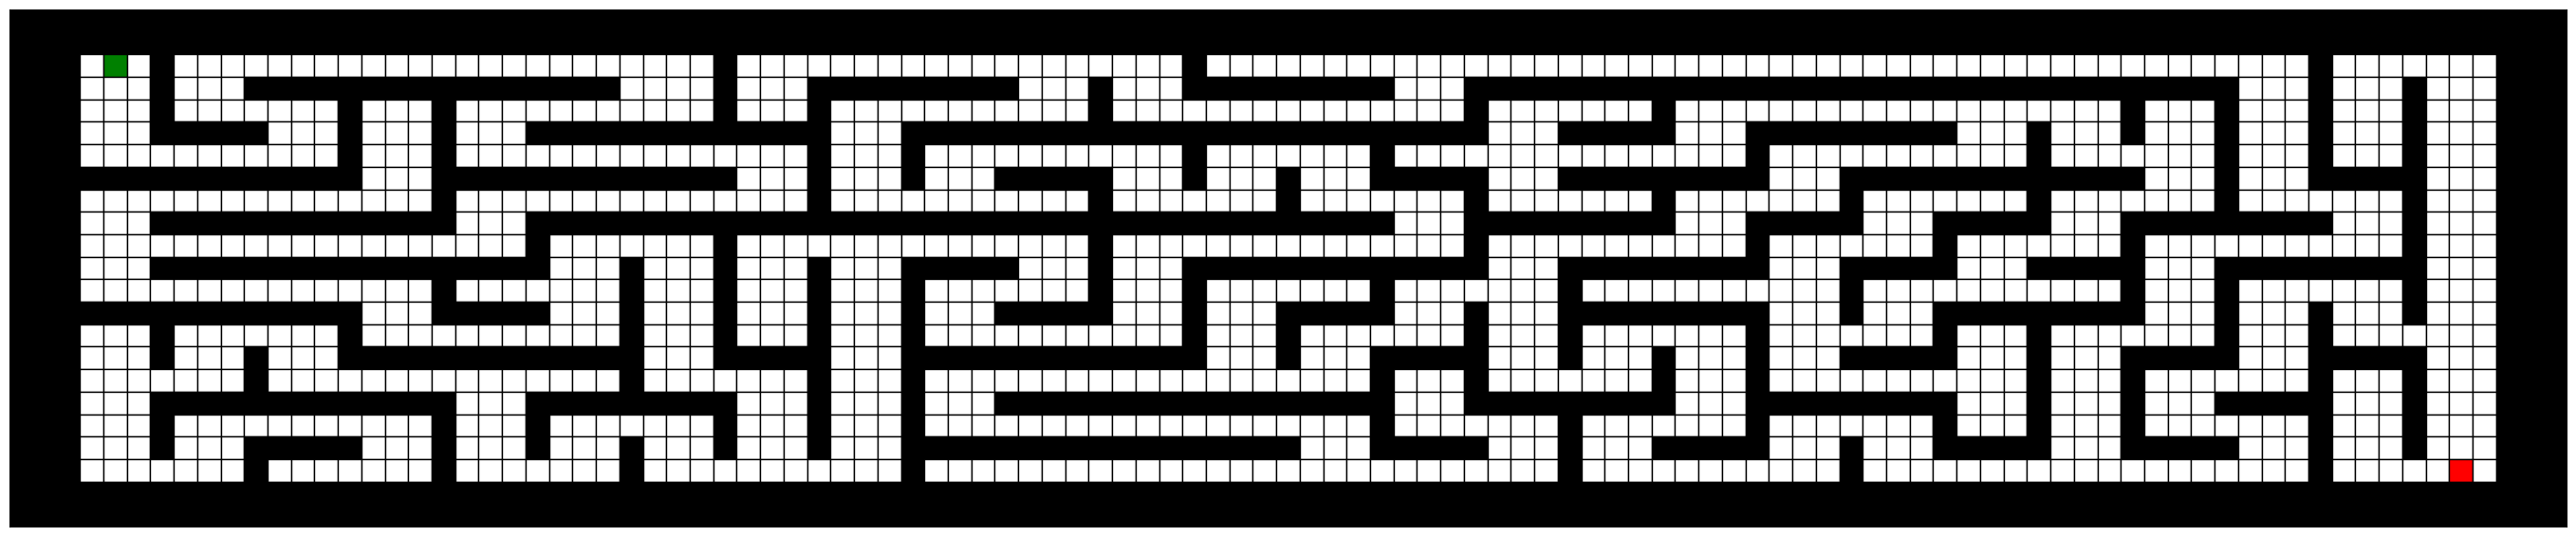


 __________________________________________________________________________________________________________________________________________

REPRESENTACION DEL LABERINTO COMO GRAFO:
defaultdict(<class 'list'>, {(2, 3): [(2, 4), (3, 3)], (2, 4): [(2, 3), (2, 5), (3, 4)], (2, 5): [(2, 4), (3, 5)], (2, 7): [(2, 8), (3, 7)], (2, 8): [(2, 7), (2, 9), (3, 8)], (2, 9): [(2, 8), (2, 10), (3, 9)], (2, 10): [(2, 9), (2, 11)], (2, 11): [(2, 10), (2, 12)], (2, 12): [(2, 11), (2, 13)], (2, 13): [(2, 12), (2, 14)], (2, 14): [(2, 13), (2, 15)], (2, 15): [(2, 14), (2, 16)], (2, 16): [(2, 15), (2, 17)], (2, 17): [(2, 16), (2, 18)], (2, 18): [(2, 17), (2, 19)], (2, 19): [(2, 18), (2, 20)], (2, 20): [(2, 19), (2, 21)], (2, 21): [(2, 20), (2, 22)], (2, 22): [(2, 21), (2, 23)], (2, 23): [(2, 22), (2, 24)], (2, 24): [(2, 23), (2, 25)], (2, 25): [(2, 24), (2, 26)], (2, 26): [(2, 25), (2, 27), (3, 26)], (2, 27): [(2, 26), (2, 28), (3, 27)], (2, 28): [(2, 27), (2, 29), (3, 28)], (2, 29): [(2, 28), (3, 29)], (

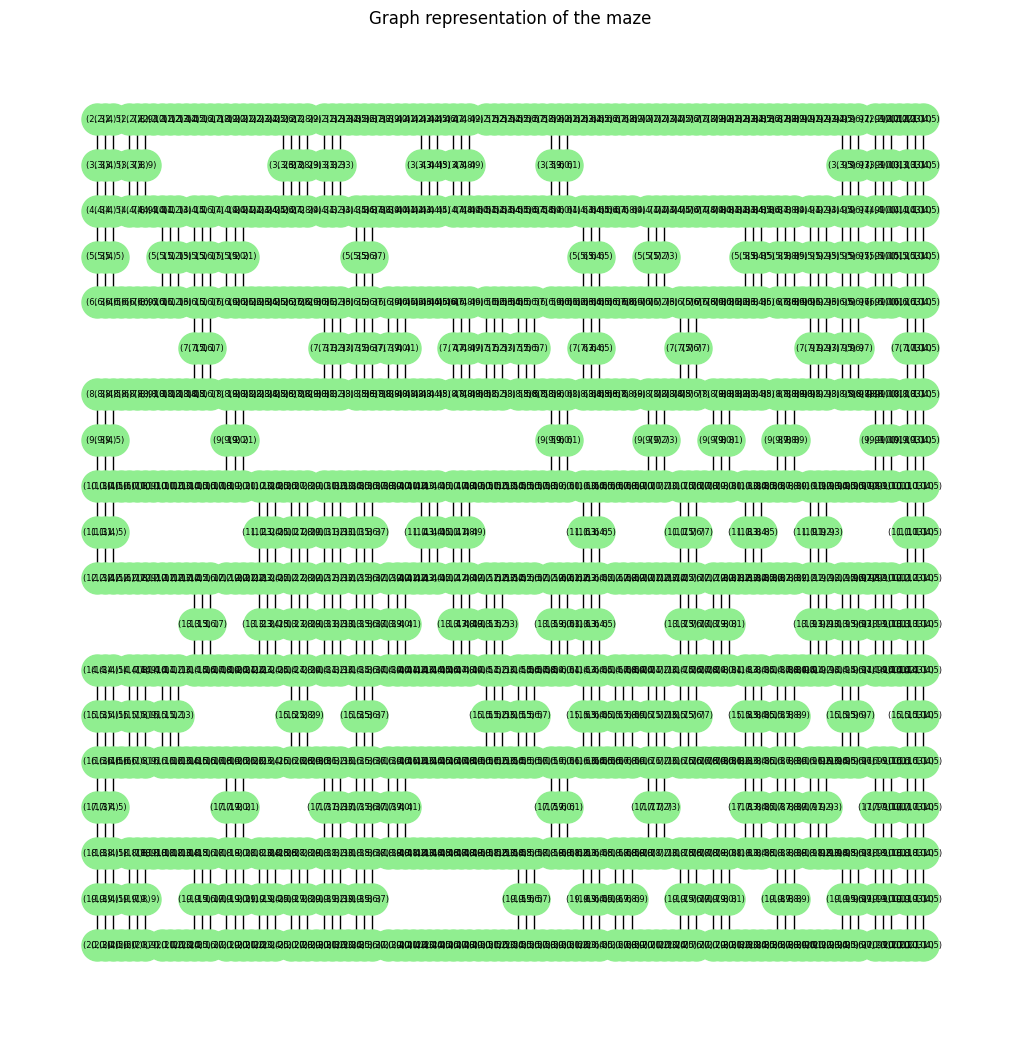


 __________________________________________________________________________________________________________________________________________

Camino de solución encontrada: [(2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (5, 11), (4, 11), (4, 10), (4, 9), (3, 9), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (3, 26), (4, 26), (4, 25), (4, 24), (4, 23), (4, 22), (4, 21), (5, 21), (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (7, 31), (8, 31), (8, 30), (8, 29), (8, 28), (8, 27), (8, 26), (8, 25), (8, 24), (8, 23), (8, 22), (8, 21), (8, 20), (8, 19), (9, 19), (10, 19), (10, 18), (10, 17), (10, 16), (10, 15), (10, 14), (10, 13), (10, 12), (10, 11), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (11, 5), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11),

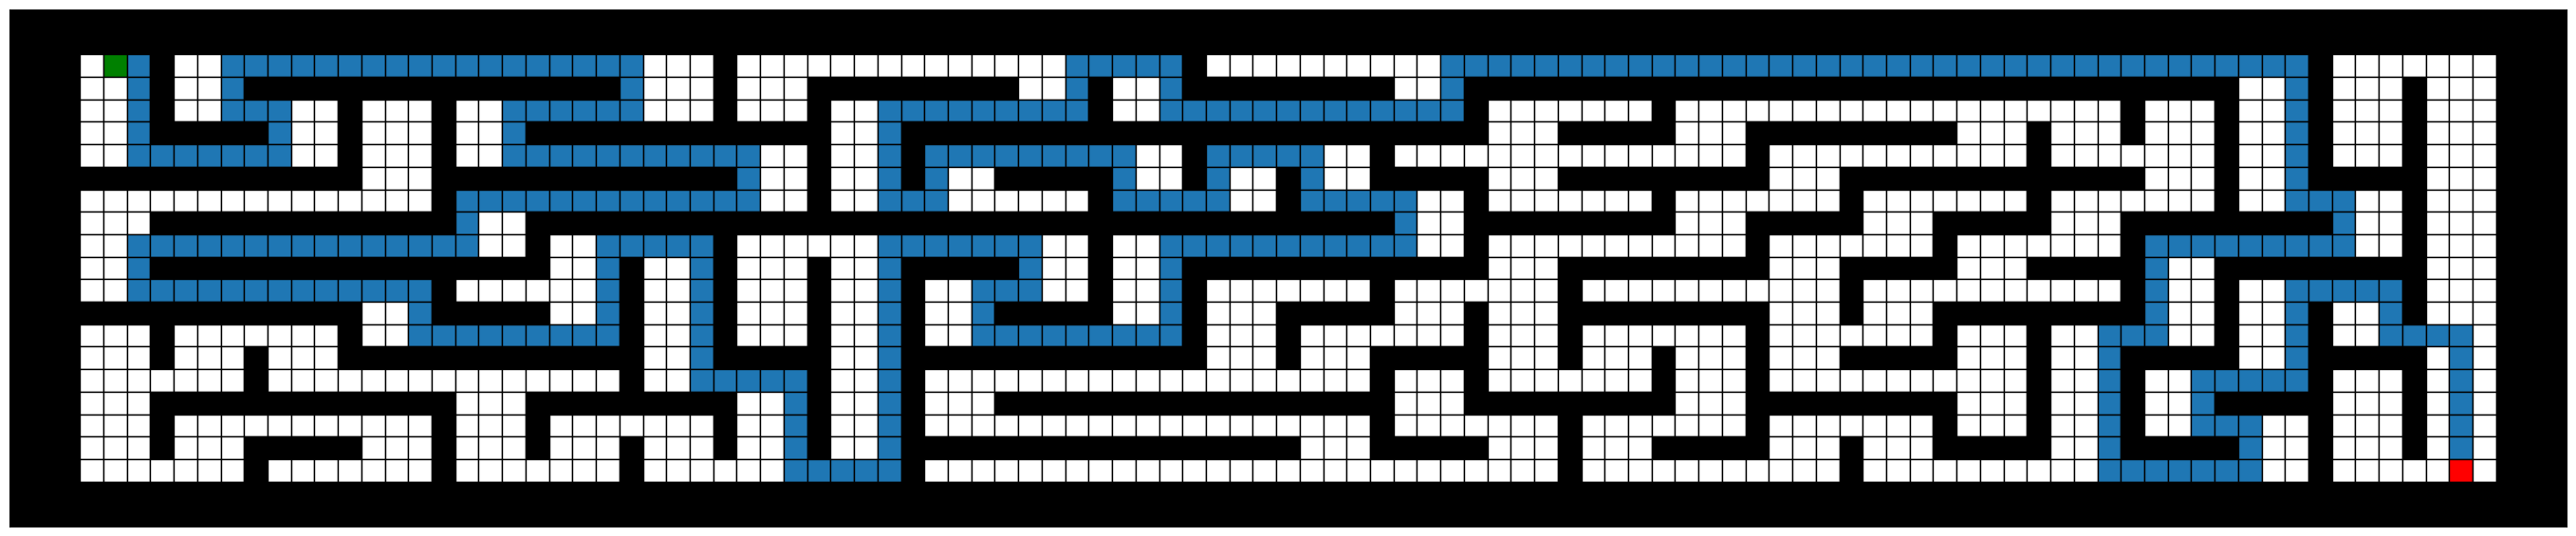

In [31]:
if __name__ == '__main__':
    study_case_3()

# ANIMACION

In [44]:
# ANIMACION
import matplotlib.animation as animation
from IPython.display import HTML

def bfs_animated(graph, start, goal):
    path = []
    visited = set()
    progress = []

    queue = deque([start])
    visited.add(start)
    
    while queue:
        current = queue.popleft()
        path.append(current)
        progress.append(list(path))
        
        if current == goal:
            return progress
        
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    return progress


def animate_solution(maze_loader, progress):
    maze = maze_loader.maze
    height = len(maze)
    width = len(maze[0])

    fig, ax = plt.subplots(figsize=(width/4, height/4))
    
    def update(frame):
        ax.clear()
        for y in range(height):
            for x in range(width):
                cell = maze[y][x]
                if (y, x) in progress[frame]:
                    color = 'magenta'
                elif cell == '#':
                    color = 'black'
                else:
                    color = 'white'
                ax.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')

        ax.set_xlim(0, width)
        ax.set_ylim(0, height)
        ax.invert_yaxis()
        ax.set_xticks([])
        ax.set_yticks([])

    animacion = animation.FuncAnimation(fig, update, frames=len(progress), repeat=False)
    return animacion


def solve_and_animate(maze_file):
    maze_loader = MazeLoader(maze_file).load_Maze()
    maze = maze_loader.maze
    graph = maze_loader.get_graph()

    start, goal = find_start_and_goal(maze)

    progress = bfs_animated(graph, start, goal)

    animacion_solucion = animate_solution(maze_loader, progress)
    
    return HTML(animacion_solucion.to_jshtml())


In [33]:
# def bfs_animated(graph, start, goal):
#     path = []
#     visited = set()
#     progress = []

#     queue = deque([start])
#     visited.add(start)
    
#     while queue:
#         current = queue.popleft()
#         path.append(current)
#         progress.append(list(path))
        
#         if current == goal:
#             return progress
        
#         for neighbor in graph[current]:
#             if neighbor not in visited:
#                 visited.add(neighbor)
#                 queue.append(neighbor)
    
#     return progress

In [40]:
# def animate_solution(maze_loader, progress):
#     maze = maze_loader.maze
#     height = len(maze)
#     width = len(maze[0])

#     fig, ax = plt.subplots(figsize=(width/4, height/4))
    
#     def update(frame):
#         ax.clear()
#         for y in range(height):
#             for x in range(width):
#                 cell = maze[y][x]
#                 if (y, x) in progress[frame]:
#                     color = 'magenta'
#                 elif cell == '#':
#                     color = 'black'
#                 else:
#                     color = 'white'
#                 ax.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')

#         ax.set_xlim(0, width)
#         ax.set_ylim(0, height)
#         ax.invert_yaxis()
#         ax.set_xticks([])
#         ax.set_yticks([])

#     animacion = animation.FuncAnimation(fig, update, frames=len(progress), repeat=False)
#     return animacion

In [41]:
# def solve_and_animate(maze_file):
#     maze_loader = MazeLoader(maze_file).load_Maze()
#     maze = maze_loader.maze
#     graph = maze_loader.get_graph()

#     start, goal = find_start_and_goal(maze)

#     progress = bfs_animated(graph, start, goal)

#     animacion_solucion = animate_solution(maze_loader, progress)
    
#     return HTML(animacion_solucion.to_jshtml())

## ANIMACION LABERINTO 1

LABERINTO 1
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto1.txt


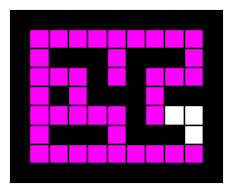

In [45]:
print("LABERINTO 1")
    
animate_html = solve_and_animate('laberinto1.txt')
    
with open("animation.html", "w") as f:
    f.write(str(animate_html))

## ANIMACION LABERINTO 2

LABERINTO 2
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto2.txt


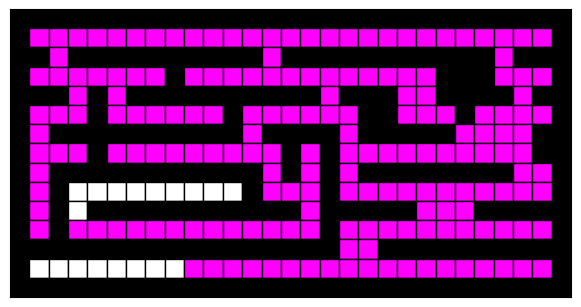

In [47]:
print("LABERINTO 2")
    
animate_html = solve_and_animate('laberinto2.txt')
    
with open("animation.html", "w") as f:
    f.write(str(animate_html))

## ANIMACION LABERINTO 3

LABERINTO 3
Loading Maze from /Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 2/P1/laberinto3.txt


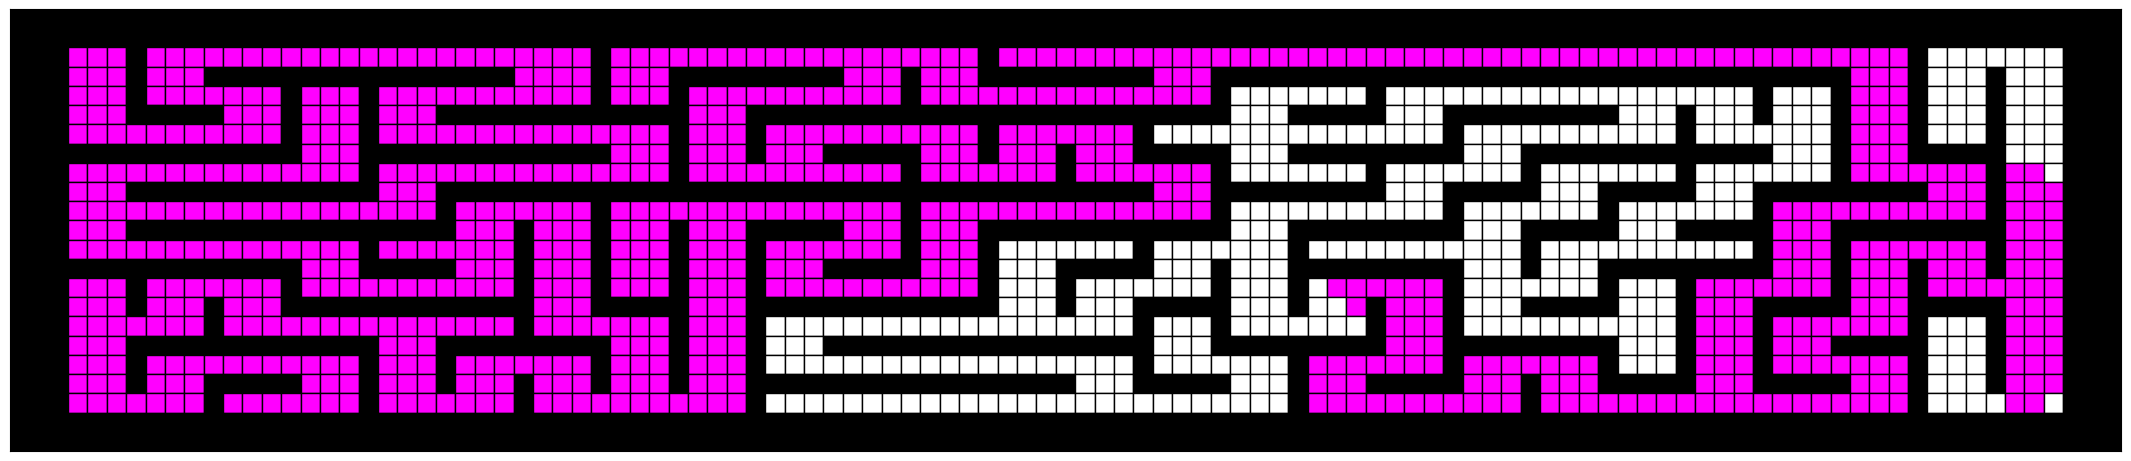

In [48]:
print("LABERINTO 3")
    
animate_html = solve_and_animate('laberinto3.txt')
    
with open("animation.html", "w") as f:
    f.write(str(animate_html))